<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Data_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Imports the numpy library
import pandas as pd # Imports the pandas library
import requests

np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

## Plots for Descriptive Statistics

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Sample DataFrame
np.random.seed(0)  # For reproducible outputs. Seed remains till the end of a session if left unchanged
data = {
    'A': np.random.randn(100),   # standard normal distribution
    'B': np.random.rand(100) * 100,  # uniform distribution between 0 and 1 (excluded)
    'C': np.random.choice(['Category 1', 'Category 2', 'Category 3'], 100),
    'D': np.random.randn(100) * 100
}
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
 2   C       100 non-null    object 
 3   D       100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


### Scatterplot
To visualize the relationship between two numeric variables:

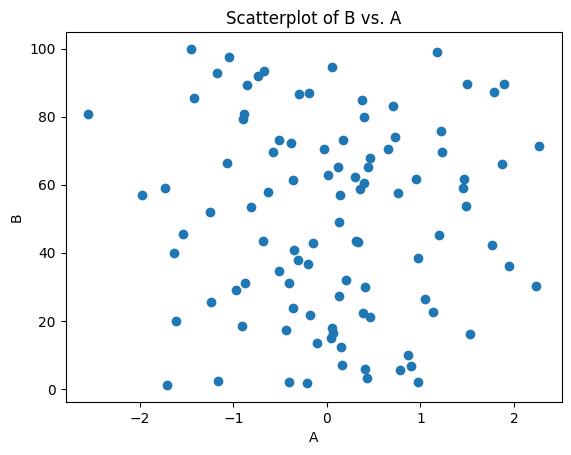

In [ ]:
plt.scatter(df['A'], df['B'])
plt.title('Scatterplot of B vs. A')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

### Histogram
To visualize the distribution of a single numeric variable:

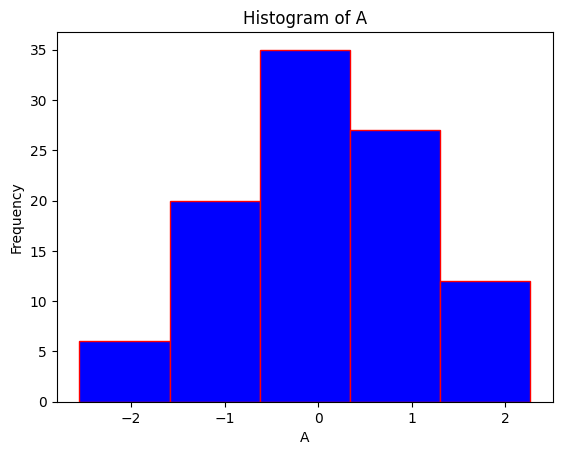

In [ ]:
plt.hist(df['A'], bins=5, color='blue', edgecolor='red')
plt.title('Histogram of A')
plt.xlabel('A')
plt.ylabel('Frequency')
plt.show()
# Notice the binning

### Boxplot
To visualize the distribution and identify any potential outliers in one or more numeric variables:

<ipython-input-5-c0c02d37b4b1>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['D'], labels=['D'])


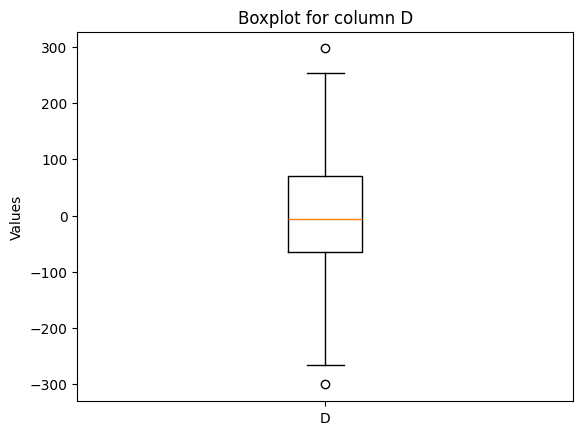

In [ ]:
plt.boxplot(df['D'], labels=['D'])
plt.title('Boxplot for column D')
plt.ylabel('Values')
plt.show()

### Q-Q Plot
Q-Q plots are mostly used to assess if a set of data plausibly came from some theoretical distribution such as a Normal or a Uniform distribution.

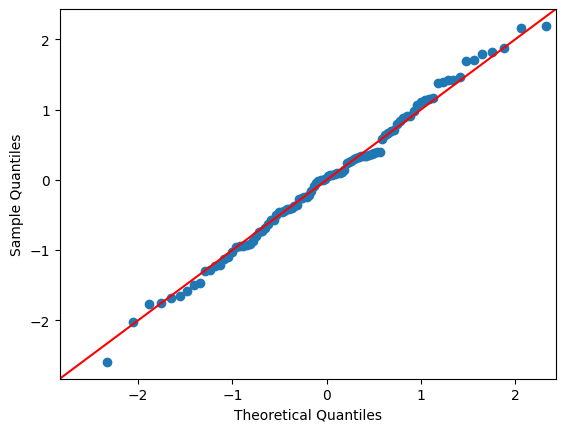

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

qqplot(df['A'], norm, fit = True, line='45');
plt.show()

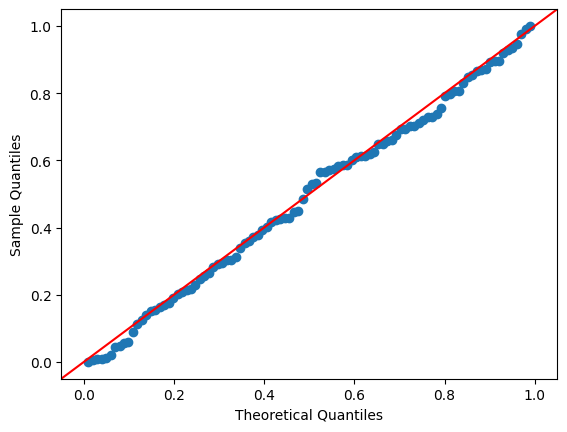

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

qqplot(df['B'], uniform, fit = True, line='45');
plt.show()

### Barplot
To visualize the mean (or other statistics) of a numeric variable grouped by a categorical variable:

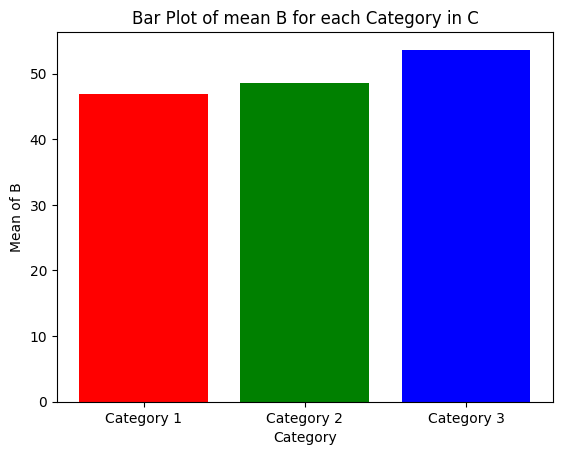

In [ ]:
means = df.groupby('C')['B'].mean()
plt.bar(means.index, means.values, color=['red', 'green', 'blue'])
plt.title('Bar Plot of mean B for each Category in C')
plt.xlabel('Category')
plt.ylabel('Mean of B')
plt.show()

## Pre-Processing of Time Series data using Pandas

If we are using the pandas library, we first convert the date time data into a 'Timestamp' object
by reading it using the .to_datetime() method

In [ ]:
date = "31-1-2024 15:34:34"
test_date = pd.to_datetime(date,dayfirst=True)
# use dayfirst = True option to suppress this warning
test_date

Timestamp('2024-01-31 15:34:34')

In [ ]:
# Robust to several specifications

# date = "31/8/2024"
# date = "jan 23 2024"
# date = "8:45pm feb 23 2022"
# date = "2024 jan 8:45 pm"
# date = "mar 2010"

test_date = pd.to_datetime(date, dayfirst = True)
test_date

Timestamp('2024-01-31 15:34:34')

#### Useful attributes of Timestamp object

In [ ]:
date = "31-1-2024 15:34:34"
test_date = pd.to_datetime(date, dayfirst = True)

test_date

Timestamp('2024-01-31 15:34:34')

In [ ]:
# We can extract the information we need using these methods
# To get the year
test_date.year

2024

In [ ]:
# For the month
test_date.month

1

In [ ]:
# Day of the month
test_date.day

31

In [ ]:
# Hour of the day (0 to 23)
test_date.hour

15

In [ ]:
# seconds
test_date.minute

34

In [ ]:
# seconds (microsecond and nanosecond also available)
test_date.second

34

In [ ]:
# day of the week. starts with monday, indexes as 0
test_date.dayofweek

2

In [ ]:
# week of the year
test_date.week

5

In [ ]:
# Boolean functions: Returns True if the date is the first day of the month.
test_date.is_month_start

False

In [ ]:
# Boolean functions: Returns True if the date is the last day of the month.
test_date.is_month_end

True

In [ ]:
# Boolean functions: Returns True if the date is the first day of the quarter.
test_date.is_quarter_start

False

In [ ]:
# Boolean functions: Returns True if the date is the first day of the year.
test_date.is_year_start

False

#### Useful methods in pandas for Timestamp objects

**Format to a specified string**

In [ ]:
# Formats the 'Timestamp' object as a string according to a specified format.
# creates a string object
new_format = test_date.strftime('%H:%M:%S %Y/%m/%d')
new_format

'15:34:34 2024/01/31'

In [ ]:
type(new_format)

str

**Normalize to midnight of same day**

In [ ]:
# Normalizes the 'Timestamp' to midnight of the same day.
normalized_date = test_date.normalize()
normalized_date
# print(normalized_date)

Timestamp('2024-01-31 00:00:00')

**Round down the time to a specific frequency**

In [ ]:
# original : date = "31-1-2024 15:34:34"
# Rounds down the Timestamp to the specified frequency.
floored_hour = test_date.floor('H')  # Round down to the nearest hour
print(floored_hour)

floored_min = test_date.floor('min')  # Round down to the nearest minute
print(floored_min)

floored_sec = test_date.floor('S')  # Round down to the nearest second
print(floored_sec)

# similar options available for ceiling and rounding to the nearest frequency

2024-01-31 15:00:00
2024-01-31 15:34:00
2024-01-31 15:34:34


<ipython-input-31-50beeb05369b>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  floored_hour = test_date.floor('H')  # Round down to the nearest hour
<ipython-input-31-50beeb05369b>:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  floored_sec = test_date.floor('S')  # Round down to the nearest second


**Extract the date part**

In [ ]:
test_date_part = test_date.date()
print(test_date_part)

2024-01-31


**Extract the time part**

In [ ]:
test_time_part = test_date.time()
print(test_time_part)

15:34:34


#### Computing difference in times between Timestamp objects

In pandas, you can find the time difference between two **Timestamp** objects by simply subtracting one from the other. The result of this subtraction is a **Timedelta** object, which represents the duration between two time points.

In [ ]:
import pandas as pd
# Define the 'Timestamp' objects
timestamp1 = pd.to_datetime('2025-03-01 14:30')
timestamp2 = pd.to_datetime('1992-10-05 07:20')

**Timedelta** object

In [ ]:
time_difference = timestamp2 - timestamp1
time_difference

Timedelta('-11836 days +16:50:00')

In [ ]:
time_difference/360

Timedelta('-33 days +02:58:48.333333334')

**Properties to Timedelta object**

In [ ]:
# Total difference in days
time_difference.days

-11836

In [ ]:
# Total difference in seconds
time_difference.total_seconds()

-1022569800.0

In [ ]:
# You can also access components directly
days = time_difference.components.days
hours = time_difference.components.hours
minutes = time_difference.components.minutes

print(f"Time Difference: {days} days, {hours} hours, and {minutes} minutes")

Time Difference: -11836 days, 16 hours, and 50 minutes


#### Converting 'Timestamp' to a 'datetime' object

* While we have used pandas to work with date time data, the **datetime** module in python also provides various methods and classes to handle dates, times, and their combinations.
* Many Python standard library modules and functions that deal with date and time expect *datetime* objects. Converting a *Timestamp* to a *datetime* object ensures compatibility with these modules without requiring additional handling or conversion code. For example,
  + A script uses pandas to manipulate time series data but then uses matplotlib for plotting, where datetime objects might be preferred for setting axis labels or ticks.
  + A web application processes data using pandas but stores results in a SQL database, requiring conversion to datetime for compatibility with the database's date and time types
  + A data processing pipeline in Python uses pandas for initial data cleaning but then passes data to a machine learning library that expects datetime objects for time series analysis.

In [ ]:
# Converting a pandas 'Timestamp' object to a python 'datetime' object
import pandas as pd

test_datetime = test_date.to_pydatetime()
print(test_datetime)
test_datetime

2024-01-31 15:34:34


datetime.datetime(2024, 1, 31, 15, 34, 34)

### Commonly used time series methods with pandas dataframes

**resample()**

* Purpose: Change the frequency of your time series data.
* Example: data.resample('D').mean() changes the frequency to daily and calculates the daily mean.

**diff()**

* Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).
* Example: data.diff() computes the difference between consecutive observations, useful for time series of changes.

**rolling()**

* Provides rolling window calculations.
* Example: data.rolling(window=3).mean() calculates the rolling mean with a window size of 3 periods.

**pct_change()**

* Calculate the percentage change between the current and a prior element.
* Example: data.pct_change() computes the percentage change between consecutive observations.

### Pre-Processing IoT data

In [ ]:
office_iot = pd.read_csv('office_iot.csv')

In [ ]:
office_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         20560 non-null  object 
 1   Temperature  20560 non-null  float64
 2   Humidity     20560 non-null  float64
 3   Light        20560 non-null  float64
 4   CO2          20560 non-null  float64
 5   Occupancy    20560 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 963.9+ KB


In [ ]:
office_iot.head(6)

,date,Temperature,Humidity,Light,CO2,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,1
5,2/2/2015 14:23,23.7600,26.260,568.666667,790.000000,1


Basic Pre-Processing:
1. Are there missing values?
2. Are all columns represented with the relevant data types? Perform the necessary conversions.
3. Inspect the time trends of the variables
4. Perform aggregate computations

1. There are no missing values.

2. The date object needs to be coded. We can use pandas to read it as a 'Timestamp' object

In [ ]:
office_iot['date'] = pd.to_datetime(office_iot['date'])
# To use time series methods using pandas, we need to explicitly define the
# time index column. The method will then use this as the reference. In our case
# we will convert  the 'date' column into the time index
office_iot.set_index('date', inplace=True)

In [ ]:
office_iot.head(6)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,1
2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,1
2015-02-02 14:23:00,23.7600,26.260,568.666667,790.000000,1


In [ ]:
office_iot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  20560 non-null  float64
 1   Humidity     20560 non-null  float64
 2   Light        20560 non-null  float64
 3   CO2          20560 non-null  float64
 4   Occupancy    20560 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 963.8 KB


* The data has been provided per minute. There seem to be multiple readings per minute. It is worthwhile aggregating data at the minute level

In [ ]:
office_iot_min_avg = office_iot.resample('min').mean()

Purpose of resample()
* Change the frequency of your time series data.
* Example: data.resample('D').mean() changes the frequency to daily and calculates the daily mean.

In [ ]:
office_iot_min_avg.head(7)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7090,26.281,581.800000,754.800000,1.0
2015-02-02 14:20:00,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1.0
2015-02-02 14:23:00,23.7570,26.230,528.633333,784.500000,1.0
2015-02-02 14:24:00,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:25:00,23.7420,26.290,522.666667,797.500000,1.0


Indexing creates extra rows that were originally not in the dataset. This is to fill any time periods that were not represented

The missing rows can be filled in multiple ways

1. **Forward Filling**: Fill missing value with the previous available in sequence

In [ ]:
office_forward_fill = office_iot_min_avg.ffill()

In [ ]:
office_forward_fill.head(7)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7090,26.281,581.800000,754.800000,1.0
2015-02-02 14:20:00,23.7090,26.281,581.800000,754.800000,1.0
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1.0
2015-02-02 14:23:00,23.7570,26.230,528.633333,784.500000,1.0
2015-02-02 14:24:00,23.7570,26.230,528.633333,784.500000,1.0
2015-02-02 14:25:00,23.7420,26.290,522.666667,797.500000,1.0


2. **Backward Filling** : Fill missing value with the next available in sequence

In [ ]:
office_backward_fill = office_iot_min_avg.bfill()

In [ ]:
office_backward_fill.head(7)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7090,26.281,581.800000,754.800000,1.0
2015-02-02 14:20:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1.0
2015-02-02 14:23:00,23.7570,26.230,528.633333,784.500000,1.0
2015-02-02 14:24:00,23.7420,26.290,522.666667,797.500000,1.0
2015-02-02 14:25:00,23.7420,26.290,522.666667,797.500000,1.0


In [ ]:
office_backward_fill.head(7)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7090,26.281,581.800000,754.800000,1.0
2015-02-02 14:20:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1.0
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1.0
2015-02-02 14:23:00,23.7570,26.230,528.633333,784.500000,1.0
2015-02-02 14:24:00,23.7420,26.290,522.666667,797.500000,1.0
2015-02-02 14:25:00,23.7420,26.290,522.666667,797.500000,1.0


3. **Custom value**: Filling with a custom value. Example: Average

In [ ]:
office_avg = (office_forward_fill + office_backward_fill)/2

# Computing the average of two Timestamp columns is defined in Pandas

In [ ]:
office_avg.head(7)

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7090,26.2810,581.800000,754.800000,1.0
2015-02-02 14:20:00,23.7195,26.2555,577.233333,762.233333,1.0
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1.0
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1.0
2015-02-02 14:23:00,23.7570,26.2300,528.633333,784.500000,1.0
2015-02-02 14:24:00,23.7495,26.2600,525.650000,791.000000,1.0
2015-02-02 14:25:00,23.7420,26.2900,522.666667,797.500000,1.0


In [ ]:
#### Parsing the timestamp data into other columns
# Since the date and time information is part of the index column, we need
# to access the index column and then get the attributes required
office_avg['Month'] = office_avg.index.month
office_avg.head(6)

,Temperature,Humidity,Light,CO2,Occupancy,Month
date,,,,,,
2015-02-02 14:19:00,23.7090,26.2810,581.800000,754.800000,1.0,2
2015-02-02 14:20:00,23.7195,26.2555,577.233333,762.233333,1.0,2
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1.0,2
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1.0,2
2015-02-02 14:23:00,23.7570,26.2300,528.633333,784.500000,1.0,2
2015-02-02 14:24:00,23.7495,26.2600,525.650000,791.000000,1.0,2


#### Student Exercise: Generate columns for hour and day of the week

In [ ]:
office_avg['Hour'] = office_avg.index.hour
office_avg['Day'] = office_avg.index.day
office_avg.head(6)

,Temperature,Humidity,Light,CO2,Occupancy,Month,Hour,Day
date,,,,,,,,
2015-02-02 14:19:00,23.7090,26.2810,581.800000,754.800000,1.0,2,14,2
2015-02-02 14:20:00,23.7195,26.2555,577.233333,762.233333,1.0,2,14,2
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1.0,2,14,2
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1.0,2,14,2
2015-02-02 14:23:00,23.7570,26.2300,528.633333,784.500000,1.0,2,14,2
2015-02-02 14:24:00,23.7495,26.2600,525.650000,791.000000,1.0,2,14,2


### Visualizing IoT data

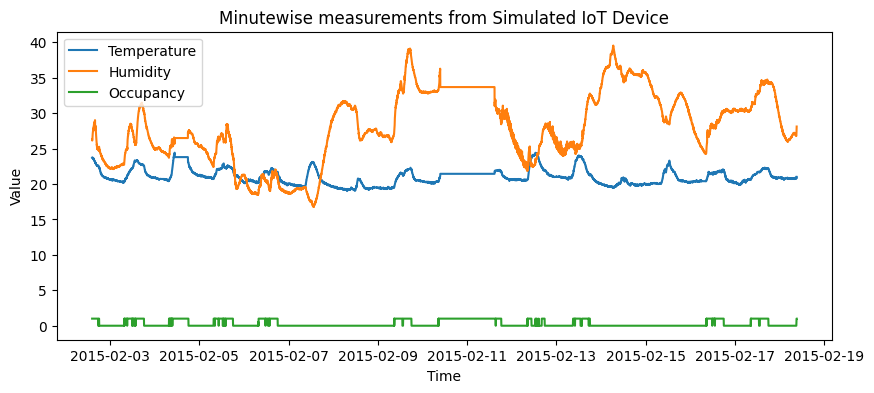

In [ ]:
# Visualization
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(office_avg.index, office_avg['Temperature'], label='Temperature')
plt.plot(office_avg.index, office_avg['Humidity'], label='Humidity')
# plt.plot(office_avg.index, office_avg['Light'], label='Light')
# plt.plot(office_avg.index, office_avg['CO2'], label='CO2')
plt.plot(office_avg.index, office_avg['Occupancy'], label='Occupancy')
plt.title('Minutewise measurements from Simulated IoT Device')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Let us now aggregate at the daily level

In [ ]:
office_daily = office_avg.resample('D').mean()

In [ ]:
office_daily.head(10)

,Temperature,Humidity,Light,CO2,Occupancy,Month,Hour,Day
date,,,,,,,,
2015-02-02,21.823919,24.577397,174.645954,695.330156,0.348967,2.0,18.64716,2.0
2015-02-03,21.438398,25.890053,211.512228,783.449355,0.415625,2.0,11.50000,3.0
2015-02-04,22.054471,25.734772,261.294670,674.934490,0.425694,2.0,11.50000,4.0
2015-02-05,21.468561,24.188782,196.208559,685.965567,0.374479,2.0,11.50000,5.0
2015-02-06,20.880089,19.837016,199.309294,597.648738,0.406076,2.0,11.50000,6.0
2015-02-07,20.576235,20.642028,66.540148,443.553927,0.000000,2.0,11.50000,7.0
2015-02-08,19.510452,29.200029,25.012159,434.033776,0.000000,2.0,11.50000,8.0
2015-02-09,20.498933,31.661680,167.454789,943.870142,0.371181,2.0,11.50000,9.0
2015-02-10,20.973518,33.459894,282.517303,744.352503,0.638194,2.0,11.50000,10.0


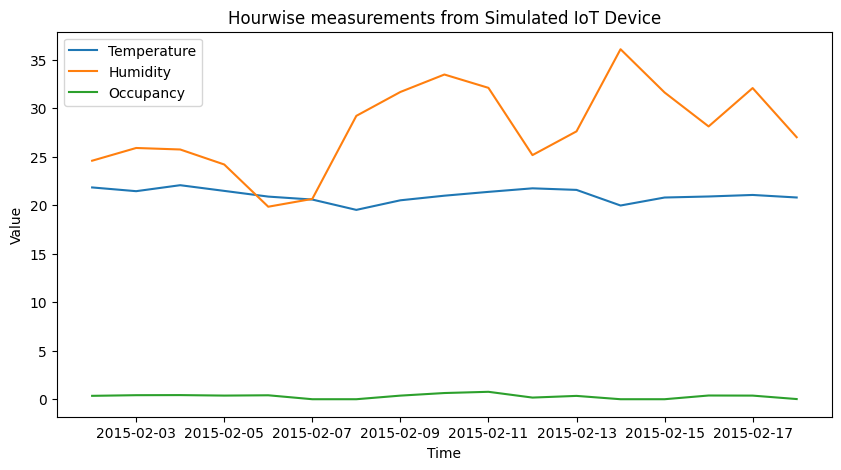

In [ ]:
# Visualization
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(office_daily.index, office_daily['Temperature'], label='Temperature')
plt.plot(office_daily.index, office_daily['Humidity'], label='Humidity')
# plt.plot(office_avg.index, office_avg['Light'], label='Light')
# plt.plot(office_avg.index, office_avg['CO2'], label='CO2')
plt.plot(office_daily.index, office_daily['Occupancy'], label='Occupancy')
# plt.plot(hourly_data.index, hourly_data['Humidity'], label='Humidity', linestyle='--')
plt.title('Hourwise measurements from Simulated IoT Device')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**Slicing the time range**

To select a range of time for plotting a time series in pandas, you can use slicing on your DataFrame or Series that has a time-based index (DatetimeIndex). After slicing the desired time range, you can then plot the subset using pandas built-in plotting capabilities or libraries like Matplotlib

In [ ]:
# Since we already defined the index for the dataframe using the date column,
# we will use the index column
office_three_days = office_avg['2015-02-10':'2015-02-13']

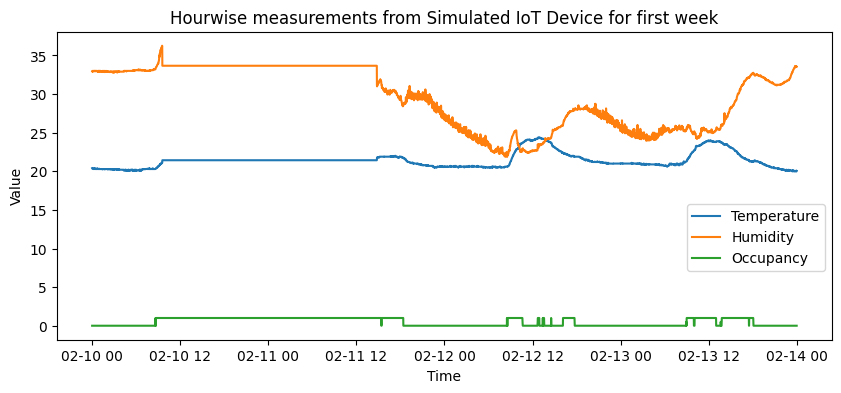

In [ ]:
# Replot
plt.figure(figsize=(10, 4))
plt.plot(office_three_days.index, office_three_days['Temperature'], label='Temperature')
plt.plot(office_three_days.index, office_three_days['Humidity'], label='Humidity')
# plt.plot(office_avg.index, office_avg['Light'], label='Light')
# plt.plot(office_avg.index, office_avg['CO2'], label='CO2')
plt.plot(office_three_days.index, office_three_days['Occupancy'], label='Occupancy')
# plt.plot(hourly_data.index, hourly_data['Humidity'], label='Humidity', linestyle='--')
plt.title('Hourwise measurements from Simulated IoT Device for first week')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2))
plt.show()

## Bengaluru House Price Data

In [ ]:
import pandas as pd
blr_home = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
blr_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


* Are there missing values? Which columns have missing values? How many?

**Count missing values in each column**

In [ ]:
# The isna method takes a dataframe and assings True or False to each cell
blr_home.isna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [ ]:
# We can sum all the True values (coded as 1) to find the number of missing values
blr_home.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
blr_home.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


**How many unique values in each column?**

In [ ]:
blr_home.nunique()

,0
area_type,4
availability,81
location,1305
size,31
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


**Are there duplicates?**

In [ ]:
blr_home.duplicated().sum()

529

In [ ]:
# Remove rows that are duplicates
blr_home.drop_duplicates(inplace = True)

In [ ]:
# We will use the 'size' column later on.
# To keep it simple we will first delete the rows with missing values in size
blr_home.dropna(subset=['size'], inplace = True)

#### Student Exercise: Creating a new column that captures the number of bedrooms

In [ ]:
blr_home['no.of Bedrooms'] = blr_home['size'].str.split().str[0]
blr_home.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,no.of Bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,6


#### Student Exercises :
(1) Group the data by the number of bedrooms and display the number of homes in each category

(2) From the area_type column, strip away the 'Area' word at the end

In [ ]:
blr_home.groupby('size').count()

,area_type,availability,location,society,total_sqft,bath,balcony,price,no.of Bedrooms
size,,,,,,,,,
1 BHK,521,521,521,347,521,514,513,521,521
1 Bedroom,104,104,104,0,104,104,104,104,104
1 RK,13,13,13,10,13,13,13,13,13
10 BHK,2,2,2,0,2,2,0,2,2
10 Bedroom,12,12,12,1,12,12,3,12,12
11 BHK,2,2,2,1,2,2,1,2,2
11 Bedroom,2,2,2,0,2,2,2,2,2
12 Bedroom,1,1,1,0,1,1,1,1,1
13 BHK,1,1,1,0,1,1,1,1,1


In [ ]:
blr_home.groupby('no.of Bedrooms').count()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
no.of Bedrooms,,,,,,,,,
1,638,638,638,638,357,638,631,630,638
10,14,14,14,14,1,14,14,3,14
11,4,4,4,4,1,4,4,3,4
12,1,1,1,1,0,1,1,1,1
13,1,1,1,1,0,1,1,1,1
14,1,1,1,1,0,1,1,1,1
16,1,1,1,1,0,1,1,0,1
18,1,1,1,1,1,1,1,0,1
19,1,1,1,1,0,1,1,0,1


In [ ]:
blr_home.groupby('area_type').count()

,availability,location,size,society,total_sqft,bath,balcony,price,no.of Bedrooms
area_type,,,,,,,,,
Built-up Area,2398,2398,2398,1209,2398,2390,2290,2398,2398
Carpet Area,87,87,87,54,87,87,82,87,87
Plot Area,1973,1973,1973,297,1973,1973,1801,1973,1973
Super built-up Area,8317,8316,8317,5890,8317,8268,8013,8317,8317


In [ ]:
blr_home['area_type'].str[ :-6]

,area_type
0,Super built-up
1,Plot
2,Built-up
3,Super built-up
4,Super built-up
...,...
13314,Super built-up
13315,Built-up
13316,Super built-up
13317,Built-up


In [ ]:
write a code to split the area

SyntaxError: invalid syntax (<ipython-input-106-41dc15ddf80d>, line 1)